In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from lab1.task2_inverse_kinematics import *
from lab1.task1_forward_kinematics import *
from lab1.Lab1_IK_answers import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [21]:
from lab1.Lab1_IK_answers import *

i = 0
path = [0, 1]
initial_joint_positions = np.array([[7, 1, 6],
                            [14, 5, 9]])
joint_positions = np.array([[7, 1, 6],
                            [14, 5, 9]])
target_end = np.array([3, 8, 5])
joint_orientations = np.array([[0., 0., 0., 1.],
                               [0., 0., 0., 1.]])
joint_orientations = [R.from_quat(o) for o in joint_orientations]
joint_parents = [-1, 0]

In [40]:
joint_offsets = joint_offsets_from_positions(initial_joint_positions,
                                                 joint_parents)
joint_offsets

array([[0, 0, 0],
       [7, 4, 3]])

In [23]:
displacement = joint_positions[path[-1]] - joint_positions[path[i]]
target_displacement = target_end - joint_positions[path[i]]

displacement, target_displacement

(array([7, 4, 3]), array([-4,  7, -1]))

In [43]:
axis_of_rotation = np.cross(displacement, target_displacement)
angle_of_rotation = np.arccos(np.dot(displacement, target_displacement) 
                              / (np.linalg.norm(displacement) * np.linalg.norm(target_displacement)))
axis_of_rotation, angle_of_rotation

TypeError: cross() got an unexpected keyword argument 'dtype'

In [25]:
rotation = R.from_rotvec(angle_of_rotation * axis_of_rotation / np.linalg.norm(axis_of_rotation))

In [26]:
update_chain_orientations(path, i, rotation, joint_orientations)
for o in joint_orientations:
    print(o.as_quat())
path, i

[-0.25856201 -0.0517124   0.67226123  0.69176322]
[0. 0. 0. 1.]


([0, 1], 0)

In [27]:
joint_positions = pose_joint_positions(initial_joint_positions[0], 
                                          joint_parents,
                                          joint_offsets,
                                          joint_orientations)

joint_positions

array([[7.        , 1.        , 6.        ],
       [2.76450783, 8.4121113 , 4.94112696]])

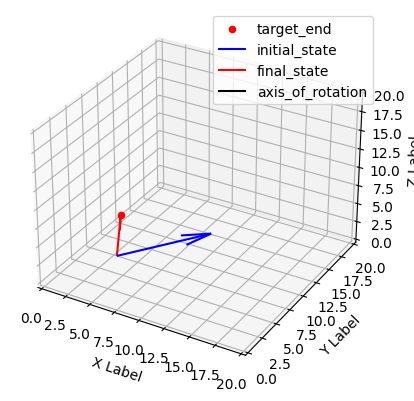

In [47]:
# Sample 3D vectors (origin and direction)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D points
ax.scatter(target_end[0], target_end[1], target_end[2], c='r', marker='o', label='target_end')

# Plot the 3D vectors
arm_start = np.array([7, 1, 6])
ax.quiver(arm_start[0], arm_start[1], arm_start[2], 
          joint_offsets[1, 0], joint_offsets[1, 1], joint_offsets[1, 2], color='b', label="initial_state")

arm_start = np.array([7, 1, 6])
ax.quiver(joint_positions[0, 0], joint_positions[0, 1], joint_positions[0, 2], 
          joint_positions[1, 0] - joint_positions[0, 0], 
          joint_positions[1, 1] - joint_positions[0, 1], 
          joint_positions[1, 2] - joint_positions[0, 2], color='r', label="final_state")

# target_displacement_start = np.array([7, 1, 6])
# ax.quiver(target_displacement_start[0], target_displacement_start[1], target_displacement_start[2], 
#           target_displacement[0], target_displacement[1], target_displacement[2], color='g', label="target_displacement")

axis_of_rotation_start = np.array([7, 1, 6])
axis_of_rotation = axis_of_rotation / np.linalg.norm(np.array([-25, -5, 65]))
ax.quiver(axis_of_rotation_start[0], axis_of_rotation_start[1], axis_of_rotation_start[2], 
          axis_of_rotation[0], axis_of_rotation[1], axis_of_rotation[2], color='black', label="axis_of_rotation")

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim(0, 20)  # Set X-axis limits
ax.set_ylim(0, 20)  # Set Y-axis limits
ax.set_zlim(0, 20)  # Set Z-axis limits

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
# traverse each joint index in path (excluding end), in forward or backward fashion:
# for each:
# compute the vector from it (inclusive) to the end (exclusive)
# compute (target_end - fixed)
# cross product these vectors to get the axis of rotation
# dot product these vectors to get the angle (should it be radian or degree?) of rotation.
# compute new orientations for joints in the chain (excluding the end)
# update the positions all joints in the chain (including the end).